In [1]:
import sys
import os

os.chdir("../")

import pandas as pd
import matplotlib

In [9]:
import data

# How many users with more clickouts have clicked on the same item more than once

In [10]:
df = data.full_df()
df = df[df['action_type'] == 'clickout item']
df = df[~df['reference'].isnull()]

In [21]:
def func(x):
    clickout_items = []
    for idx, row in x.iterrows():
        clickout_items.append(int(row['reference']))
    clickout_items_set = set(clickout_items)
    d = {'num of clickouts': [len(clickout_items)], 'num of distinct clickouts': [len(clickout_items_set)]}
    return pd.DataFrame(data=d)

In [22]:
grouped = df.groupby(['user_id']).apply(func)

In [23]:
grouped

,,num of clickouts,num of distinct clickouts
user_id,,,
0001VQMGUI65,0,5,4
0003QTCX5MJX,0,1,1
0004IOZI7CKF,0,3,3
0004WCFRV3FB,0,1,1
0006W0R5A5V8,0,1,1
00071784XQ6B,0,1,1
0008B0X0HC39,0,1,1
0008BO33KUQ0,0,7,4
0008W02TLRNR,0,1,1


### Users that have more than one clickout

In [24]:
len(grouped[grouped['num of clickouts']>1])/len(grouped)

0.4495869426077397

### Almost half of the users that have more than one clickout (50% of the users) have clicked more then once on  the same reference in a clickout

In [15]:
len(grouped[grouped['num of distinct clickouts'] < grouped['num of clickouts']])/len(grouped)

0.483424524379263

In [25]:
values = grouped['num of clickouts'].values

## Plotting the distribution of number of clickouts

In [29]:
import matplotlib.pyplot as plt
import numpy as np

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text yticklabel objects>)

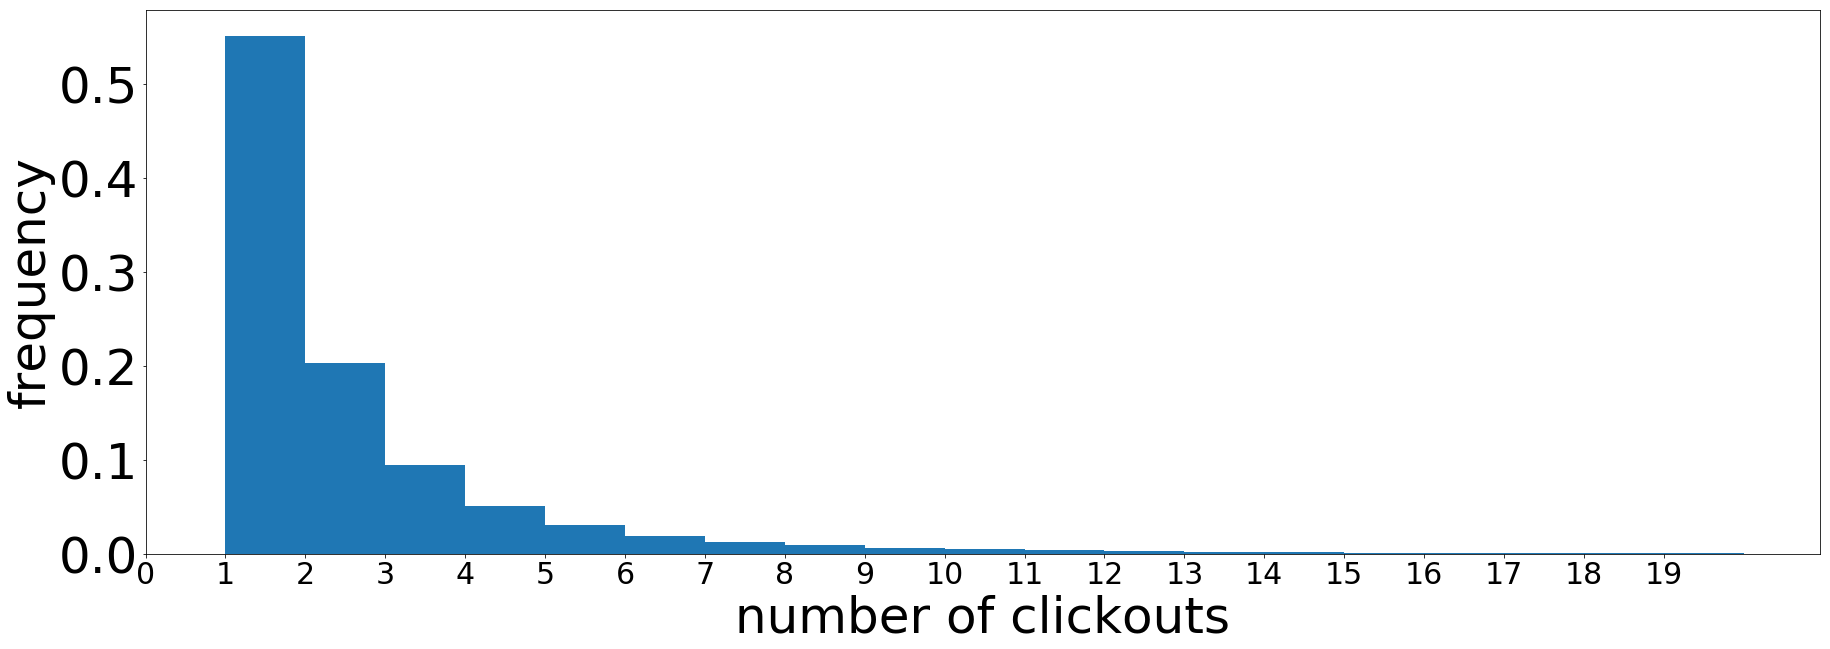

In [37]:
fig, ax = plt.subplots(figsize=(30, 10))
plt.hist(values, range=(1,10), bins=np.arange(values.min(), values.min()+20),weights = np.ones(len(values))/len(values))

#plt.yscale('log', nonposy='clip')
plt.xlabel('number of clickouts', size=50)
plt.ylabel('frequency', size=50)
plt.xticks(np.arange(20), size = 30)
plt.yticks(size = 50)